# Insurance History EDA


In [1]:
#auto loading
%load_ext autoreload
%autoreload 2

## 🧱 1. Setup & Imports

In [2]:
import warnings
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
from preprocessing.data_quality_utils import DataQualityUtils 
from utils.load_data import load_local_data
from utils.helpers import DataInspectionUtils
from preprocessing.eda import EDAUtils,MultivariateAnalysis

In [3]:
# Automatically go to project root (where .git or README.md is)
project_root = Path.cwd()
while not (project_root / "README.md").exists() and project_root != project_root.parent:
    project_root = project_root.parent

os.chdir(project_root)
print("Project root set to:", project_root)


Project root set to: /home/teshager/Documents/10Academy/repositories/projects/insurance-risk-modeling


In [4]:
#suppress warning errors
warnings.filterwarnings("ignore")
#load enviroment variables
load_dotenv()

True

### 📌 Project Overview

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [66]:
# Load the insurance data
raw_data_dir= os.getenv("RAW_DATA")
processed_data_dir=os.getenv("PROCESSED_DATA")
df=pd.read_csv(raw_data_dir,delimiter = '|')
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Dataset Overview

In [6]:
#view sample data
df.sample(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
821007,255757,21642,2015-07-01 00:00:00,True,,Private company,Mr,English,Standard Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,21.929825,0.0
427201,14275,554,2015-02-01 00:00:00,False,,Individual,Mr,English,Nedbank,Current account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,0.000000,0.0
889587,19522,921,2015-02-01 00:00:00,False,ZA,Individual,Mr,English,Capitec Bank,Savings account,...,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,573.938772,0.0
299797,148915,13231,2015-07-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Cleaning and Removal of Accident Debris,Cleaning and Removal of Accident Debris,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,6.849737,0.0
324994,168803,13602,2015-05-01 00:00:00,False,,Individual,Mr,English,First National Bank,Current account,...,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,1.850965,0.0


In [7]:
#see the last rows
df.tail()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
1000093,31520,389,2015-04-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000094,31520,389,2015-06-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000095,31520,389,2015-08-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0.0
1000096,31519,389,2014-07-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0
1000097,31519,389,2015-02-01 00:00:00,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0.0


In [8]:
#shape of the dataset
df.shape

(1000098, 52)

In [9]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [10]:
di=DataInspectionUtils()

### Look into distinct values from each column

In [11]:
#list out distinct values from each column
di.display_column_uniques(df)

[2025-06-12 18:18:58,916] INFO - Computing unique values for each column...
INFO:utils.helpers:Computing unique values for each column...


Column,Data Type,Unique Count,Unique Sample (max 10)
UnderwrittenCoverID,int64,116532,"[145249, 145255, 145247, 145245, 127439, 127445, 127437, 120087, 120086, 82059, ...]"
PolicyID,int64,7000,"[12827, 10874, 10173, 7174, 10902, 10623, 4044, 7493, 7492, 7434, ...]"
TransactionMonth,object,23,"[2015-03-01 00:00:00, 2015-05-01 00:00:00, 2015-07-01 00:00:00, 2015-01-01 00:00:00, 2015-04-01 00:00:00, 2015-06-01 00:00:00, 2015-08-01 00:00:00, 2015-02-01 00:00:00, 2014-12-01 00:00:00, 2014-11-01 00:00:00, ...]"
IsVATRegistered,bool,2,"[True, False]"
Citizenship,object,4,"[ , AF, ZA, ZW]"
LegalType,object,6,"[Close Corporation, Individual, Partnership, Private company, Public company, Sole proprieter]"
Title,object,5,"[Mr, Dr, Miss, Mrs, Ms]"
Language,object,1,[English]
Bank,object,11,"[First National Bank, Standard Bank, ABSA Bank, Capitec Bank, Nedbank, FirstRand Bank, Investec Bank, Ithala Bank, Old Mutual, Mercantile Lisbon Bank, ...]"
AccountType,object,3,"[Current account, Savings account, Transmission account]"


[2025-06-12 18:19:01,047] INFO - Unique values displayed successfully.
INFO:utils.helpers:Unique values displayed successfully.


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* Columns that only have only one unique value offer no analytical / predictive value hence need to be removed
</div>

In [12]:
di.get_constant_columns(df)

[2025-06-12 18:19:01,074] INFO - Checking for columns with only one unique value...
INFO:utils.helpers:Checking for columns with only one unique value...
[2025-06-12 18:19:02,076] INFO - Found 6 constant columns.
INFO:utils.helpers:Found 6 constant columns.


column,constant_value
Language,English
Country,South Africa
ItemType,Mobility - Motor
NumberOfVehiclesInFleet,NaN
StatutoryClass,Commercial
StatutoryRiskType,IFRS Constant


## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [13]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000098.0,1.048175e+05,6.329371e+04,1.000000e+00,5.514300e+04,9.408300e+04,1.391900e+05,3.011750e+05
PolicyID,1000098.0,7.956682e+03,5.290039e+03,1.400000e+01,4.500000e+03,7.071000e+03,1.107700e+04,2.324600e+04
PostalCode,1000098.0,3.020601e+03,2.649854e+03,1.000000e+00,8.270000e+02,2.000000e+03,4.180000e+03,9.870000e+03
mmcode,999546.0,5.487770e+07,1.360381e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000098.0,2.010225e+03,3.261391e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,999546.0,4.046642e+00,2.940201e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,999546.0,2.466743e+03,4.428006e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,999546.0,9.720792e+01,1.939326e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,999546.0,4.019250e+00,4.683144e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,220456.0,2.255311e+05,5.645157e+05,2.000000e+04,1.350000e+05,2.200000e+05,2.800000e+05,2.655000e+07


In [14]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
TransactionMonth,1000098,23,2015-08-01 00:00:00,106747
Citizenship,1000098,4,,895210
LegalType,1000098,6,Individual,911929
Title,1000098,5,Mr,933555
Language,1000098,1,English,1000098
Bank,854137,11,First National Bank,260811
AccountType,959866,3,Current account,597938
MaritalStatus,991839,3,Not specified,986208
Gender,990562,3,Not specified,940990
Country,1000098,1,South Africa,1000098


In [15]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [16]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

UnderwrittenCoverID         116532
TotalPremium                 38959
CalculatedPremiumPerTerm     19869
PolicyID                      7000
SumInsured                    2186
TotalClaims                   1615
CapitalOutstanding            1011
CustomValueEstimate            923
PostalCode                     888
mmcode                         427
Model                          411
VehicleIntroDate               174
cubiccapacity                  122
kilowatts                       82
make                            46
SubCrestaZone                   45
CoverCategory                   28
RegistrationYear                25
TransactionMonth                23
CoverType                       22
MainCrestaZone                  16
CoverGroup                      14
ExcessSelected                  13
bodytype                        13
Bank                            11
Province                         9
Cylinders                        7
LegalType                        6
NumberOfDoors       

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [17]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [18]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
NumberOfVehiclesInFleet,1000098,100.00%
CrossBorder,999400,99.93%
CustomValueEstimate,779642,77.96%
Rebuilt,641901,64.18%
Converted,641901,64.18%
WrittenOff,641901,64.18%
NewVehicle,153295,15.33%
Bank,145961,14.59%
AccountType,40232,4.02%
Gender,9536,0.95%


### Missing Values

In [19]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
NumberOfVehiclesInFleet,1000098,100.00%
CrossBorder,999400,99.93%
CustomValueEstimate,779642,77.96%
WrittenOff,641901,64.18%
Rebuilt,641901,64.18%
Converted,641901,64.18%
NewVehicle,153295,15.33%
Bank,145961,14.59%


In [20]:
df[df['CrossBorder']=='No']['Province'].unique()

array(['Gauteng'], dtype=object)

In [21]:
dft=df[df['CrossBorder'].isna()]
dft[dft['Province']=='Gauteng'][['Province','CrossBorder']]

,Province,CrossBorder
0,Gauteng,NaN
1,Gauteng,NaN
2,Gauteng,NaN
3,Gauteng,NaN
4,Gauteng,NaN
...,...,...
999809,Gauteng,NaN
999810,Gauteng,NaN
999811,Gauteng,NaN
999812,Gauteng,NaN


In [22]:
# Create two groups
crossborder_nan = df[df['CrossBorder'].isna()]
crossborder_no = df[df['CrossBorder'] == 'No']

In [23]:
# Example 1: Average distance or province
crossborder_nan['Province'].value_counts(normalize=True)
crossborder_no['Province'].value_counts(normalize=True)

# Example 2: SumInsured or claims
crossborder_nan[['SumInsured', 'TotalClaims']].describe()


,SumInsured,TotalClaims
count,9.994000e+05,999400.000000
mean,6.042034e+05,64.906490
std,1.508435e+06,2384.906475
min,1.000000e-02,-12002.412281
25%,5.000000e+03,0.000000
50%,7.500000e+03,0.000000
75%,2.500000e+05,0.000000
max,1.263620e+07,393092.105263


In [24]:
crossborder_no[['SumInsured', 'TotalClaims']].describe()

,SumInsured,TotalClaims
count,6.980000e+02,698.0
mean,5.601977e+05,0.0
std,1.353423e+06,0.0
min,1.000000e-02,0.0
25%,5.000000e+03,0.0
50%,7.500000e+03,0.0
75%,5.000000e+05,0.0
max,5.000000e+06,0.0


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* There are no claims from those that had No for Cross border
</div>

In [25]:
# Check province distribution for NaN in CrossBorder
nan_crossborder = df[df['CrossBorder'].isna()]
border_provinces = ['Limpopo', 'Mpumalanga', 'North West', 'Free State', 'KwaZulu-Natal', 'Northern Cape']

# Count how many NaNs are in each province
province_counts = nan_crossborder['Province'].value_counts()

# Are they mainly from border provinces?
border_nan_counts = province_counts.loc[province_counts.index.isin(border_provinces)]
nonborder_nan_counts = province_counts.loc[~province_counts.index.isin(border_provinces)]

print("NaN CrossBorder from border provinces:\n", border_nan_counts)
print("\nNaN CrossBorder from non-border provinces:\n", nonborder_nan_counts)

# Compare financials
print("\nStats for NaN CrossBorder:")
print(nan_crossborder[['SumInsured', 'TotalClaims']].describe())


NaN CrossBorder from border provinces:
 Province
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64

NaN CrossBorder from non-border provinces:
 Province
Gauteng         393167
Western Cape    170796
Eastern Cape     30336
Name: count, dtype: int64

Stats for NaN CrossBorder:
         SumInsured    TotalClaims
count  9.994000e+05  999400.000000
mean   6.042034e+05      64.906490
std    1.508435e+06    2384.906475
min    1.000000e-02  -12002.412281
25%    5.000000e+03       0.000000
50%    7.500000e+03       0.000000
75%    2.500000e+05       0.000000
max    1.263620e+07  393092.105263


In [26]:

df[df['CrossBorder'].isna()]['Province'].unique()

array(['Gauteng', 'KwaZulu-Natal', 'Mpumalanga', 'Eastern Cape',
       'Western Cape', 'Limpopo', 'North West', 'Free State',
       'Northern Cape'], dtype=object)

<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* NumberOfVehiclesinFleet has 100% missing values hence can be safely removed, the others need closer investigation since there is a possibility they are left open because
  <br>they are presumed obvious.
</div>

### Duplicates

In [27]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [28]:
dq.find_invalid_values()

{'Citizenship': {'count': 895210,
  'examples': 0      
  1      
  2      
  3      
  4      
  Name: Citizenship, dtype: object}}

In [29]:
df['Citizenship'].value_counts()

Citizenship
      895210
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [30]:
#saving the original dataset for later use
df_original=df.copy()

### Constant Columns

In [31]:
df=dq.drop_constant_columns(df)

[WARNING] [drop_constant_columns] Expected boolean for 'verbose', got <class 'pandas.core.frame.DataFrame'>. Defaulting to True.
[INFO] Dropped constant columns: ['Language', 'Country', 'ItemType', 'NumberOfVehiclesInFleet', 'StatutoryClass', 'StatutoryRiskType']
INFO:preprocessing.data_quality_utils:Dropped constant columns: ['Language', 'Country', 'ItemType', 'NumberOfVehiclesInFleet', 'StatutoryClass', 'StatutoryRiskType']


### Missing Values

In [32]:
#552 rows missing all the critical values
dq.drop_rows_with_missing_values(df,['make','NumberOfDoors','kilowatts','cubiccapacity','Cylinders','VehicleIntroDate','Model','bodytype','VehicleType','mmcode'],True)

In [33]:
#drop the 562 values
df=df[df['make'].notnull()]

In [34]:
#drop the crossborder column >99% missing
dq.drop_columns(df,['CrossBorder']);

In [35]:
df_writeoff=df[df['Converted'].isnull()]

In [36]:
df_writeoff.shape

(641349, 46)

In [37]:
df_writeoff['TotalClaims'].value_counts()

TotalClaims
0.000000        639503
6140.350877        233
750.649123          65
1300.000000         53
850.000000          32
                 ...  
54429.824561         1
54631.578947         1
36251.938596         1
17239.394737         1
28903.850877         1
Name: count, Length: 1078, dtype: int64

In [38]:
df.isnull().sum().sort_values(ascending=False)

CrossBorder                 998848
CustomValueEstimate         779090
WrittenOff                  641349
Rebuilt                     641349
Converted                   641349
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
CapitalOutstanding               2
SumInsured                       0
AlarmImmobiliser                 0
TrackingDevice                   0
UnderwrittenCoverID              0
TermFrequency                    0
CalculatedPremiumPerTerm         0
VehicleIntroDate                 0
CoverCategory                    0
CoverType                        0
CoverGroup                       0
Section                          0
Product                          0
TotalPremium                     0
ExcessSelected                   0
bodytype                         0
NumberOfDoors                    0
PolicyID                         0
TransactionMonth    

### Inconsistencies and Inaccuracies

In [39]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [40]:
df=dq.convert_columns_to_datetime()

[INFO] [VehicleIntroDate] Converted: 999546/999546 (0 became NaT)
INFO:preprocessing.data_quality_utils:[VehicleIntroDate] Converted: 999546/999546 (0 became NaT)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999546 entries, 0 to 1000097
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   UnderwrittenCoverID       999546 non-null  int64              
 1   PolicyID                  999546 non-null  int64              
 2   TransactionMonth          999546 non-null  object             
 3   IsVATRegistered           999546 non-null  bool               
 4   Citizenship               999546 non-null  object             
 5   LegalType                 999546 non-null  object             
 6   Title                     999546 non-null  object             
 7   Bank                      853585 non-null  object             
 8   AccountType               959314 non-null  object             
 9   MaritalStatus             991287 non-null  object             
 10  Gender                    990010 non-null  object             
 11  Prov

In [42]:
#convert binary columns into booleans
unique_counts=df.nunique()
binaries=unique_counts[df.nunique()==2]
binary_index=binaries.index.to_list()
binary_index =[x for x in binary_index if x not in ["NewVehicle","TermFrequency","IsVATRegistered"]]
binary_index

['AlarmImmobiliser', 'TrackingDevice', 'WrittenOff', 'Rebuilt', 'Converted']

In [43]:
for col in binary_index:
    dq.impute_value_in_column(df,col,'Yes',True)
    dq.impute_value_in_column(df,col,'No',False)

In [44]:

for col in binary_index:
    print(df[col].unique())

['Yes' 'No']
['No' 'Yes']
[nan 'No' 'Yes']
[nan 'No' 'Yes']
[nan 'No' 'Yes']


In [45]:
dq.impute_missing_values(df,['CrossBorder','WrittenOff','Rebuilt','Converted','NewVehicle','Bank','AccountType','Gender','MaritalStatus'],'Unknown',True);
# dq.impute_missing_values(df,['CrossBorder','CustomValueEstimate','WrittenOff','Rebuilt','Converted','NewVehicle','Bank','AccountType','Gender','MaritalStatus'],'Unknown',True);
    

In [46]:
df.isna().sum().sort_values(ascending=False)

CustomValueEstimate         779090
CapitalOutstanding               2
UnderwrittenCoverID              0
CrossBorder                      0
VehicleIntroDate                 0
AlarmImmobiliser                 0
TrackingDevice                   0
NewVehicle                       0
WrittenOff                       0
Rebuilt                          0
Converted                        0
SumInsured                       0
PolicyID                         0
TermFrequency                    0
CalculatedPremiumPerTerm         0
ExcessSelected                   0
CoverCategory                    0
CoverType                        0
CoverGroup                       0
Section                          0
Product                          0
TotalPremium                     0
NumberOfDoors                    0
bodytype                         0
kilowatts                        0
cubiccapacity                    0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship         

In [75]:
numeric_cols=df.select_dtypes(include=['number']).columns.to_list()

In [81]:
numeric_cols

['UnderwrittenCoverID',
 'PolicyID',
 'PostalCode',
 'mmcode',
 'RegistrationYear',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'NumberOfDoors',
 'CustomValueEstimate',
 'NumberOfVehiclesInFleet',
 'SumInsured',
 'CalculatedPremiumPerTerm',
 'TotalPremium',
 'TotalClaims']

###  Outlier Detection

In [77]:
dq.detect_outliers_iqr(df,numeric_cols)

{'UnderwrittenCoverID':         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
 1040                 277823     13608  2015-08-01 00:00:00            False   
 1042                 277820     13608  2015-08-01 00:00:00            False   
 2523                 277829     13608  2015-08-01 00:00:00            False   
 2524                 277824     13608  2015-08-01 00:00:00            False   
 3256                 277822     13608  2015-08-01 00:00:00            False   
 ...                     ...       ...                  ...              ...   
 997939               265264     22505  2015-08-01 00:00:00            False   
 997945               300164     23103  2015-08-01 00:00:00            False   
 997946               300174     23103  2015-08-01 00:00:00            False   
 999812               266687     20611  2015-08-01 00:00:00            False   
 999813               266688     20611  2015-07-01 00:00:00            False   
 
        Citizen

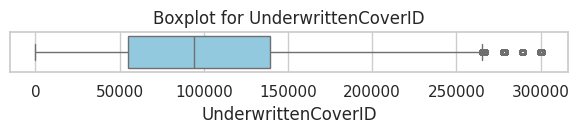

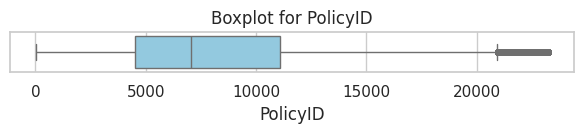

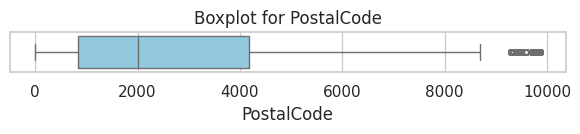

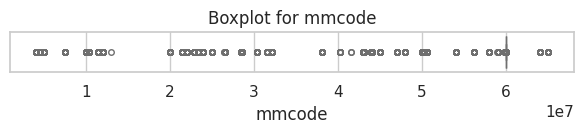

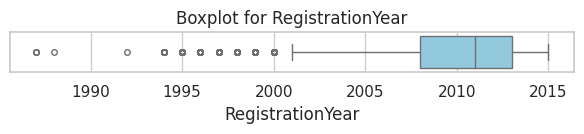

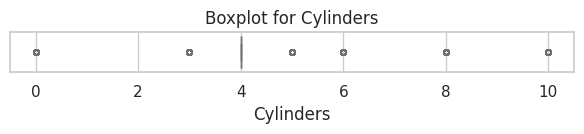

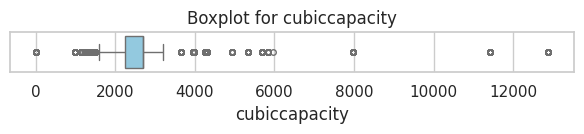

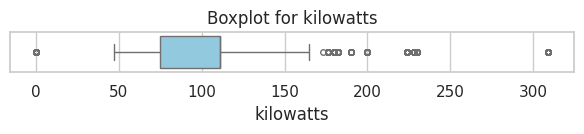

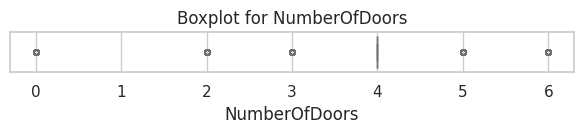

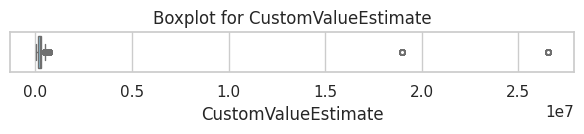

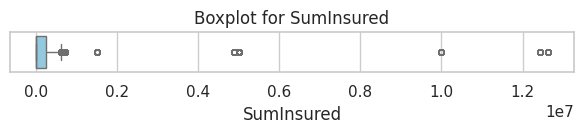

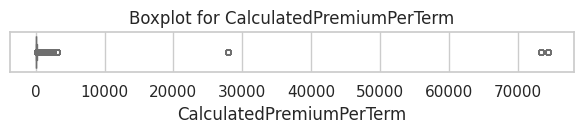

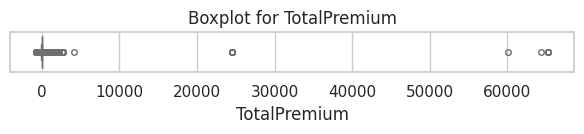

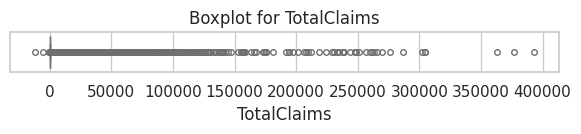

{'UnderwrittenCoverID':         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
 1040                 277823     13608  2015-08-01 00:00:00            False   
 1042                 277820     13608  2015-08-01 00:00:00            False   
 2523                 277829     13608  2015-08-01 00:00:00            False   
 2524                 277824     13608  2015-08-01 00:00:00            False   
 3256                 277822     13608  2015-08-01 00:00:00            False   
 ...                     ...       ...                  ...              ...   
 997939               265264     22505  2015-08-01 00:00:00            False   
 997945               300164     23103  2015-08-01 00:00:00            False   
 997946               300174     23103  2015-08-01 00:00:00            False   
 999812               266687     20611  2015-08-01 00:00:00            False   
 999813               266688     20611  2015-07-01 00:00:00            False   
 
        Citizen

In [82]:
dq.detect_outliers_iqr_with_boxplot(df,numeric_cols)

# Univariate Analysis

In [47]:
#numberic columns
df_numeric=df.select_dtypes(include=['number'])
df_numeric.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'SumInsured',
       'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'],
      dtype='object')

In [48]:
#bolean columns
df_bool=df.select_dtypes(include=['bool'])
df_bool.columns

Index(['IsVATRegistered'], dtype='object')

In [49]:
#date columns
df_date=df.select_dtypes(include=['datetime'])
df_date.columns

Index([], dtype='object')

In [50]:
df_cat=df.select_dtypes(include=['object'])
df_cat.columns

Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Bank',
       'AccountType', 'MaritalStatus', 'Gender', 'Province', 'MainCrestaZone',
       'SubCrestaZone', 'VehicleType', 'make', 'Model', 'bodytype',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder',
       'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType',
       'CoverGroup', 'Section', 'Product'],
      dtype='object')

In [51]:
eda=EDAUtils(df)

In [52]:
# eda.univariate_analysis()

# Multivariate Analysis

In [53]:
mva = MultivariateAnalysis(df)

# Pair plot
# mva.pairplot(features=['Cylinders','kilowatts','TotalClaims','SumInsured','CalculatedPremiumPerTerm'], hue="Province")

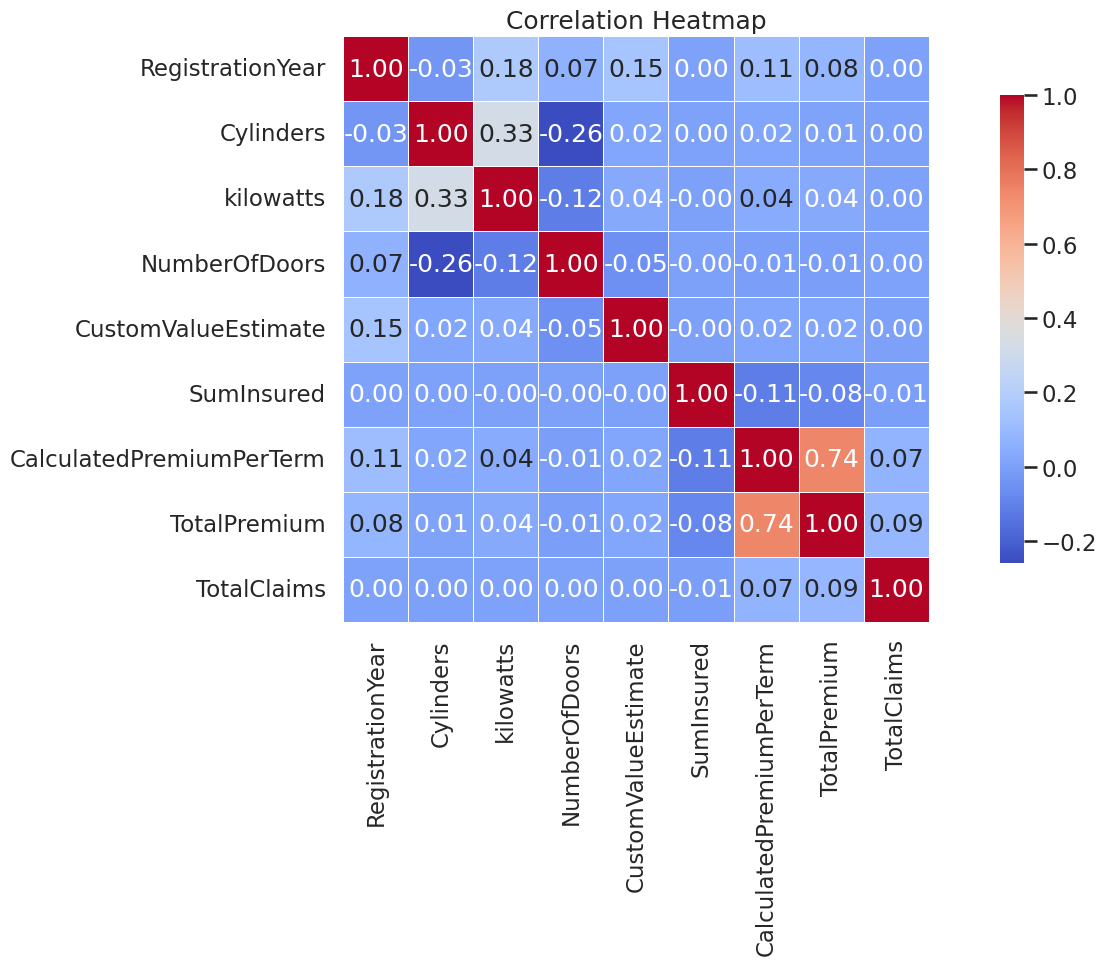

In [54]:
# Heatmap
mva.correlation_heatmap(features=[
       'RegistrationYear', 'Cylinders', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'SumInsured',
       'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'])

In [55]:

# PCA with optional scaling and color-coded by "Province"
# mva.pca_analysis(hue="Province")

### Citizenship

In [56]:
df['Citizenship'].value_counts()

Citizenship
      894658
ZA    103721
ZW       936
AF       231
Name: count, dtype: int64

In [57]:
df['Citizenship'].unique()

array(['  ', 'AF', 'ZA', 'ZW'], dtype=object)

✅ Likely Hypothesis

If 'ZA' stands for South African citizens explicitly, and most entries are ' ' (blank), it’s very plausible that the blanks represent South African citizens by default (i.e., default assumed value = ZA unless specified).

In [58]:
empty_cit=df[df['Citizenship'] !='  ']

In [59]:
empty_cit[empty_cit['IsVATRegistered']==True]

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,...,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims


<div style="border-radius:10px; border:orange solid; padding: 15px; font-size:100%; text-align:left; font-color:#325939;background-color:#2c2c2c">
<h3 align="left"><font color='orange'>💡 Observations:</font></h3>

* 🔍 Observation:

    All rows where Citizenship is blank (' ') have:  IsVATRegistered == False

🧠 Interpretation:

In South Africa, foreign individuals or entities are more likely to:

    Be VAT registered (e.g., if operating a business), Have their nationality explicitly recorded (e.g., ZW, AF).
</div>

In [60]:
df['AccountType'].unique()

array(['Current account', 'Savings account', 'Unknown',
       'Transmission account'], dtype=object)

In [61]:
other=df[df['Citizenship']=='  ']
other[other['IsVATRegistered']==False].sample(5)

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Bank,AccountType,MaritalStatus,...,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims
594228,1284,163,2014-04-01 00:00:00,False,,Individual,Mr,Standard Bank,Current account,Not specified,...,Monthly,5.4482,No excess,Keys and Alarms,Keys and Alarms,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,4.779123,0.0
285369,126239,10767,2015-03-01 00:00:00,False,,Individual,Mr,First National Bank,Current account,Not specified,...,Monthly,6.6131,No excess,Emergency Charges,Emergency Charges,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,0.000000,0.0
77868,142310,12550,2015-05-01 00:00:00,False,,Individual,Mr,ABSA Bank,Current account,Not specified,...,Monthly,733.8451,Mobility - Taxi with value more than R100 000 ...,Own Damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,0.000000,0.0
183836,155588,12538,2015-03-01 00:00:00,False,,Individual,Mr,ABSA Bank,Savings account,Not specified,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,21.929825,0.0
284853,18880,1070,2015-06-01 00:00:00,False,,Individual,Mr,First National Bank,Current account,Not specified,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,21.929825,0.0


### Rebuilt

In [62]:
df["Rebuilt"].value_counts()

Rebuilt
Unknown    641349
No         358165
Yes            32
Name: count, dtype: int64

In [83]:
# Save to csv
file_path = os.path.join(processed_data_dir, 'cleaned_insurance_data.csv')
df.to_csv(file_path, index=False)